# Digit Recognizer

## Import Libraries

In [174]:
#import libraries 
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


## Read Data

In [175]:
train_data=pd.read_csv("train.csv")
train_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
train_data.shape

(42000, 785)

In [177]:
test_data=pd.read_csv("test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
test_data.shape

(28000, 784)

In [179]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [180]:
X_train=(train_data.iloc[:,1:].values).astype("float32") # all pixel values of train data
y_train=train_data.iloc[:,0].values.astype('int32') # label of train data
X_test=test_data.values.astype('float32')  #all pixel values in test data

In [181]:
X_train,X_test,y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([1, 0, 1, ..., 7, 6, 9]))

## Visualize data

Text(0.5, 1.0, 'Label of X_train[24] is 2')

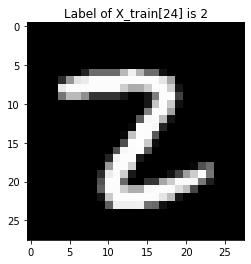

In [182]:
X_train=X_train.reshape(X_train.shape[0],28,28)    # convert train data set in [num train images,28,28] format
plt.imshow(X_train[24],plt.get_cmap('gray'))
plt.title( "Label of X_train[24] is "+str(y_train[24]))

In [183]:
#reshape to gray scale image by adding 1 as dimension
X_train=X_train.reshape(X_train.shape[0],28,28,1)
print(X_train.shape)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


## Preprocessing

In [184]:
# standardization
mean_pixel=X_train.mean().astype(np.float32)
std_pixel=X_train.std().astype(np.float32)
def standardization(x):
    return (x-mean_pixel)/std_pixel
print(y_train.shape)
y_train

(42000,)


array([1, 0, 1, ..., 7, 6, 9])

In [185]:
#one hot encoding of labels
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
print(y_train.shape)
y_train

(42000, 10)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [186]:
num_classes=y_train.shape[1]
num_classes

10

C:\Users\sivaluxan\Anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]')

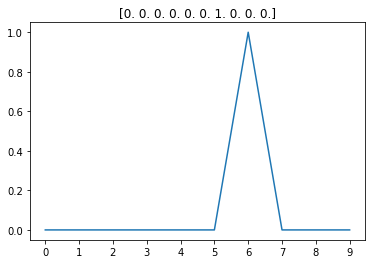

In [187]:
#plot an label
plt.plot(y_train[45])
plt.xticks(range(num_classes))
plt.title(y_train[45])

In [188]:
#image generator
from keras.preprocessing import image
img_gen=image.ImageDataGenerator()

In [189]:
#cross validation 
from sklearn.model_selection import train_test_split
X=X_train
y=y_train

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)
batches=img_gen.flow(X_train,y_train,batch_size=64)
val_batches=img_gen.flow(X_val,y_val,batch_size=64)

## CNN Model with BatchNormalization

In [190]:
#importing libraries 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Lambda,BatchNormalization, Convolution2D,MaxPooling2D
from keras.callbacks import EarlyStopping

In [191]:
#add batch normalization
from keras.layers.normalization import BatchNormalization

def batch_normalization_model():
    model = Sequential([
        Lambda(standardization, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [195]:
BatchNormalization_Model=batch_normalization_model()
history=BatchNormalization_Model.fit_generator(generator=batches, steps_per_epoch=1000, epochs=1, 
                    validation_data=val_batches, validation_steps=1000)

1000/1000 [==============================] - 115s 114ms/step - loss: 0.2814 - accuracy: 0.9280 - val_loss: 0.1133 - val_accuracy: 0.9738


In [196]:
#predict for testset
predict=BatchNormalization_Model.predict_classes(X_test,verbose=0)
output=pd.DataFrame({'ImageId':list(range(1,len(predict)+1)),'Label':predict})
output.to_csv('Digit_recognizer_CNN(keras).csv',index=False,header=True)

C:\Users\sivaluxan\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [197]:
output

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
